# Testing correctness of results

In [15]:
from pylab import rcParams
import pandas as pd
import os.path
import json

rcParams['figure.figsize'] = 20, 10

In [16]:
file_path = os.path.join("files", "comparison_domains_ranks.csv")

In [17]:
df = pd.read_csv(file_path)
df.head()

,Domain ID,Our Fast Pagerank Value,Numpy Pagerank Value,Scipy Pagerank Value
0,0.0,0.001934,0.001934,0.001919
1,1.0,0.002083,0.002083,0.002075
2,2.0,0.002011,0.002011,0.002015
3,3.0,0.002071,0.002071,0.002067
4,4.0,0.002117,0.002117,0.002119


In [4]:
df.describe()

,Domain ID,Our Fast Pagerank Value,Numpy Pagerank Value,Scipy Pagerank Value
count,500.000000,500.000000,500.000000,500.000000
mean,249.500000,0.002000,0.002000,0.002000
std,144.481833,0.000135,0.000135,0.000134
min,0.000000,0.001621,0.001621,0.001623
25%,124.750000,0.001911,0.001911,0.001911
50%,249.500000,0.001990,0.001990,0.001993
75%,374.250000,0.002091,0.002091,0.002092
max,499.000000,0.002437,0.002437,0.002421


In [5]:
# normalize cols
pageranks_values_names = ['Our Fast Pagerank Value', 'Numpy Pagerank Value',
                     'Scipy Pagerank Value']

for name in pageranks_values_names:
    initial_sum = df[name].sum()
    print('Initial sum of cols of ', name, " -- ", initial_sum)

    if abs(1 - initial_sum) > 1e-6:
        df[name] = df[name] / df[name].sum()

df.describe()
df.head()

Initial sum of cols of  Our Fast Pagerank Value  --  0.9999999999999746
Initial sum of cols of  Numpy Pagerank Value  --  0.999999999999975
Initial sum of cols of  Scipy Pagerank Value  --  0.9999999999999738


,Domain ID,Our Fast Pagerank Value,Numpy Pagerank Value,Scipy Pagerank Value
0,0.0,0.001934,0.001934,0.001919
1,1.0,0.002083,0.002083,0.002075
2,2.0,0.002011,0.002011,0.002015
3,3.0,0.002071,0.002071,0.002067
4,4.0,0.002117,0.002117,0.002119


<AxesSubplot:>

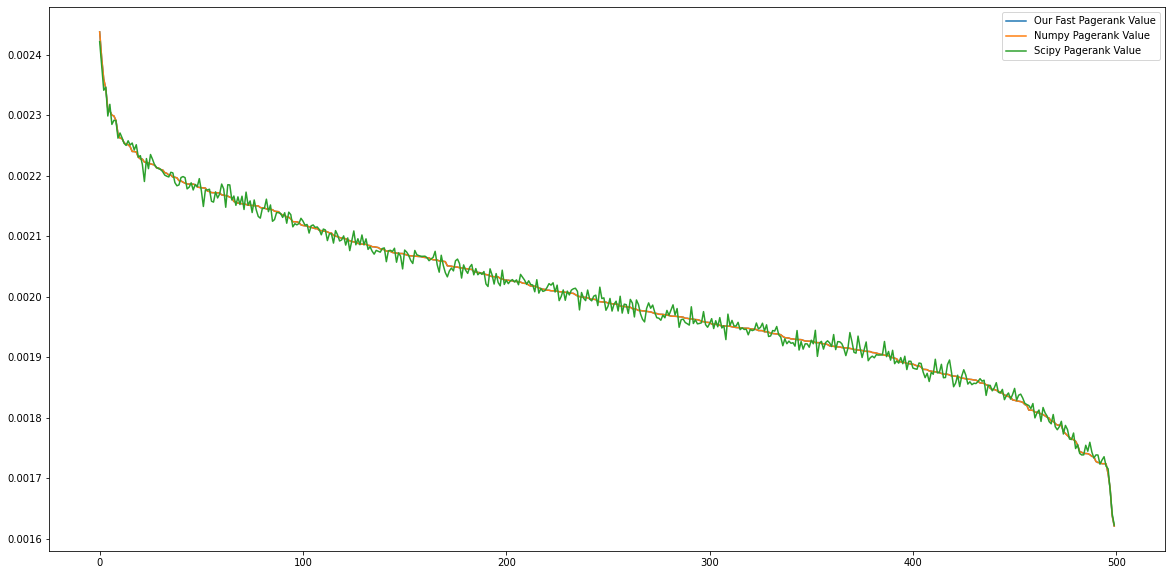

In [6]:
df = df.sort_values(by=pageranks_values_names[0], ascending = False)
df = df.reset_index(drop=True)

df.loc[:, df.columns != "Domain ID"].plot()

In [7]:
ranks_cols_names = ['Our Rank', 'Numpy Pagerank Rank',
                    'Scipy Pagerank Rank']
for i, name in enumerate(pageranks_values_names):
    df = df.sort_values(by=name, ascending = False)
    df = df.reset_index(drop=True)
    df[ranks_cols_names[i]] = df.index

df

,Domain ID,Our Fast Pagerank Value,Numpy Pagerank Value,Scipy Pagerank Value,Our Rank,Numpy Pagerank Rank,Scipy Pagerank Rank
0,440.0,0.002437,0.002437,0.002421,0,0,0
1,84.0,0.002394,0.002394,0.002382,1,1,1
2,448.0,0.002344,0.002344,0.002346,3,3,2
3,12.0,0.002359,0.002359,0.002341,2,2,3
4,303.0,0.002307,0.002307,0.002318,5,5,4
...,...,...,...,...,...,...,...
495,232.0,0.001724,0.001724,0.001720,495,495,495
496,28.0,0.001707,0.001707,0.001716,496,496,496
497,457.0,0.001683,0.001683,0.001680,497,497,497
498,42.0,0.001638,0.001638,0.001642,498,498,498


Are all layers belong to one plot ? --  True


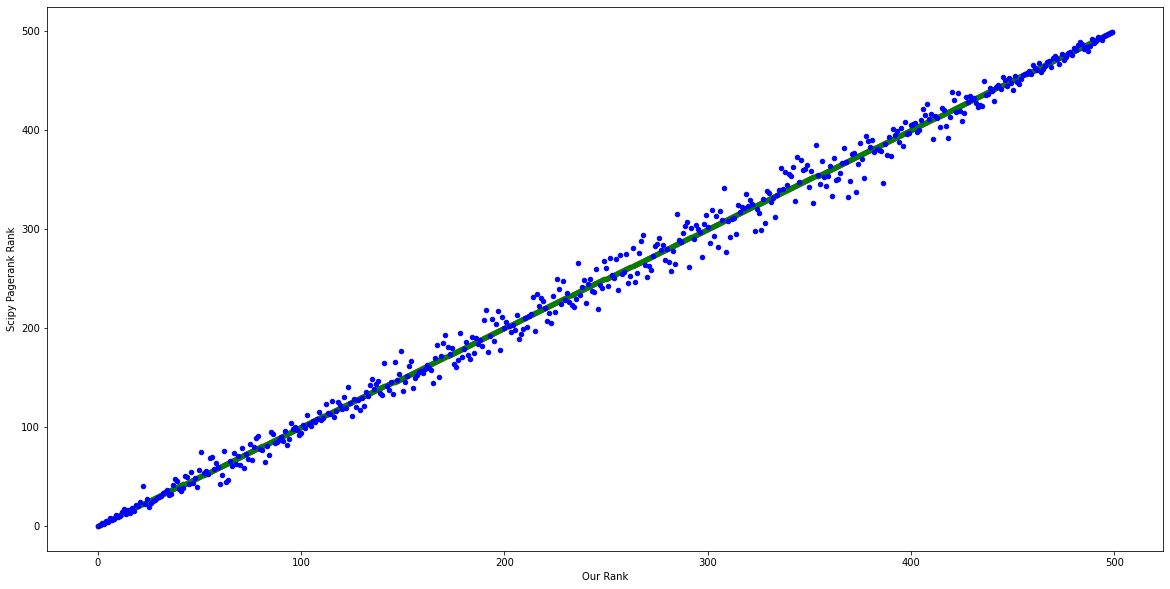

In [8]:
ax1 = df.plot.scatter(x=ranks_cols_names[0], y=ranks_cols_names[0], color='r')

colors = ['g', 'b', '#cd00ff']

ax2 = df.plot.scatter(x=ranks_cols_names[0], y=ranks_cols_names[1], color=colors[0], ax=ax1)
ax3 = df.plot.scatter(x=ranks_cols_names[0], y=ranks_cols_names[2], color=colors[1], ax=ax1)

print("Are all layers belong to one plot ? -- ", ax1 == ax2 == ax3)

# ax1.legend()

In [9]:
# calculate Root Mean Square Error
for i in range(1, len(pageranks_values_names)):
    print(f"RMSR between {pageranks_values_names[0]} and {pageranks_values_names[i]}:",
        (( df[pageranks_values_names[0]] - df[pageranks_values_names[i]] ) ** 2).mean() ** .5)

RMSR between Our Fast Pagerank Value and Numpy Pagerank Value: 1.1785544969342134e-12
RMSR between Our Fast Pagerank Value and Scipy Pagerank Value: 9.383849060471524e-06


# Testing results of personalization

In [23]:
with open(os.path.join("files", "result_domain_ranks.json"), "r", encoding="utf-8") as f:
    result_ranks = json.load(f)

with open(os.path.join("files", "personalized_result_domain_ranks.json"), "r", encoding="utf-8") as f:
    personalized_result_ranks = json.load(f)

result_ranks = [result_ranks, personalized_result_ranks]

In [24]:
columns_names = ['Domain ID', 'Simple Pagerank Value', 'Personalized Pagerank Value']

new_df = pd.DataFrame(columns=columns_names)
len_columns_names = len(columns_names)

for domain in result_ranks[0].keys():
    new_row = [domain]

    for m in range(len_columns_names - 1):
        if result_ranks[m].get(domain, -1) != -1:
            new_row.append(result_ranks[m][domain])

    if len(new_row) == len_columns_names:
        new_df.loc[domain] = new_row

new_df.head()

,Domain ID,Simple Pagerank Value,Personalized Pagerank Value
https://facebook.com,https://facebook.com,0.008110,0.059909
https://twitter.com,https://twitter.com,0.004828,0.000630
https://google.com,https://google.com,0.004460,0.009668
https://youtube.com,https://youtube.com,0.003788,0.014861
https://developers.google.com,https://developers.google.com,0.003316,0.024029


In [25]:
new_df.describe()

,Simple Pagerank Value,Personalized Pagerank Value
count,846.000000,8.460000e+02
mean,0.001182,1.182033e-03
std,0.000415,5.053388e-03
min,0.001061,0.000000e+00
25%,0.001075,0.000000e+00
50%,0.001079,1.662562e-08
75%,0.001115,1.092220e-04
max,0.008110,5.990877e-02


In [43]:
ranks_cols_names = ['Simple Pagerank', 'Personalized Pagerank']
comparison_top_sites_df = pd.DataFrame()
for i, name in enumerate(columns_names[1:]):
    new_df = new_df.sort_values(by=name, ascending = False)
    new_df = new_df.reset_index(drop=True)
    comparison_top_sites_df[ranks_cols_names[i] + " Top Websites"] = new_df.loc[:49, columns_names[0]]
    # new_df[ranks_cols_names[i]] = new_df.index

comparison_top_sites_df.insert(0, "Rank", [i + 1 for i in range(0, len(comparison_top_sites_df.index))])
comparison_top_sites_df

,Rank,Simple Pagerank Top Websites,Personalized Pagerank Top Websites
0,1,https://facebook.com,https://facebook.com
1,2,https://twitter.com,https://l.facebook.com
2,3,https://google.com,https://developers.facebook.com
3,4,https://youtube.com,https://portal.facebook.com
4,5,https://developers.google.com,https://pay.facebook.com
5,6,https://policies.google.com,https://es-la.facebook.com
6,7,https://l.facebook.com,https://hu-hu.facebook.com
7,8,https://instagram.com,https://fr-fr.facebook.com
8,9,https://linkedin.com,https://tr-tr.facebook.com
9,10,https://apple.com,https://ar-ar.facebook.com
